# <u>**Netflix Subscription Type Prediction**</u>

## Step 1: Data Loading and Pre-processing

First, we need to install the required libraries and import them.

In [1]:
# Installing necessary libraries
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install seaborn


# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Next, we load the dataset and take a look at the first few rows of the dataset.

In [2]:
# Load the dataset
df = pd.read_csv('/Users/rwilcox/Projects/Netflix Project/Netflix Userbase.csv')

# Take a look at the first few rows of the DataFrame.
print(df.head())


   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  


Now, we'll perform some basic pre-processing.  Let's check if there are any missing values in the data. If there are, we'll need to make a decision on how to handle them - for example, we could remove those rows or columns, or fill the missing values with a specified method (like the mean or the median of that column).

In [3]:
# Check for missing values
print(df.isnull().sum())

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


We will drop the `User ID`, `Join Date`, `Last Payment Date` and `Plan Duration` columns as they are not required for our analysis.  We will drop `Monthly Revenue` as it is highly correlated with our target variable `Subscription Type`.  

In [4]:
df = df.drop(['User ID','Monthly Revenue','Join Date', 'Last Payment Date', 'Plan Duration'], axis=1)

Since there are no missing values, next we need to convert categorical data to numerical, as machine learning algorithms work better with numerical data. We'll use `LabelEncoder` from `sklearn.preprocessing` to do this.  Lastly, we will map out each variable for reference.

In [5]:
# Create a label encoder object
le = LabelEncoder()

# Convert each categorical variable to numeric and print out each mapping
df['Subscription Type'] = le.fit_transform(df['Subscription Type'])
print("Subscription Type mapping:")
for i, category in enumerate(le.classes_):
    print(f"{category} --> {i}")

# Repeat for other columns
df['Country'] = le.fit_transform(df['Country'])
print("\nCountry mapping:")
for i, category in enumerate(le.classes_):
    print(f"{category} --> {i}")

df['Gender'] = le.fit_transform(df['Gender'])
print("\nGender mapping:")
for i, category in enumerate(le.classes_):
    print(f"{category} --> {i}")

df['Device'] = le.fit_transform(df['Device'])
print("\nDevice mapping:")
for i, category in enumerate(le.classes_):
    print(f"{category} --> {i}")

Subscription Type mapping:
Basic --> 0
Premium --> 1
Standard --> 2

Country mapping:
Australia --> 0
Brazil --> 1
Canada --> 2
France --> 3
Germany --> 4
Italy --> 5
Mexico --> 6
Spain --> 7
United Kingdom --> 8
United States --> 9

Gender mapping:
Female --> 0
Male --> 1

Device mapping:
Laptop --> 0
Smart TV --> 1
Smartphone --> 2
Tablet --> 3


After this, the data is ready for EDA (exploratory data analysis) and then to be split into a training set and a test set.

## Step 2: Exploratory Data Analysis (EDA)

EDA involves making sense of the data we have. Here we'll generate some simple descriptive statistics and visualizations to understand the underlying structure and relationships within our data.

Let's start by getting descriptive statistics for our DataFrame:

In [6]:
print(df.describe())

       Subscription Type      Country          Age       Gender       Device
count        2500.000000  2500.000000  2500.000000  2500.000000  2500.000000
mean            0.907600     5.116400    38.795600     0.497200     1.500400
std             0.835788     2.972942     7.171778     0.500092     1.125036
min             0.000000     0.000000    26.000000     0.000000     0.000000
25%             0.000000     2.000000    32.000000     0.000000     0.000000
50%             1.000000     6.000000    39.000000     0.000000     2.000000
75%             2.000000     8.000000    45.000000     1.000000     3.000000
max             2.000000     9.000000    51.000000     1.000000     3.000000


This will provide a summary of the numeric columns in your DataFrame.

Next, you might want to know how balanced your target variable 'subscription_type' is, i.e., how many instances there are of each class.

In [7]:
print(df['Subscription Type'].value_counts())

Subscription Type
0    999
2    768
1    733
Name: count, dtype: int64


It's important to understand the distribution of the target variable because if it's highly imbalanced, we may need to consider techniques like resampling or using a different evaluation metric.

To visualize the data, we can use libraries like Matplotlib or Seaborn. For instance, let's see how subscription type is distributed across different countries:

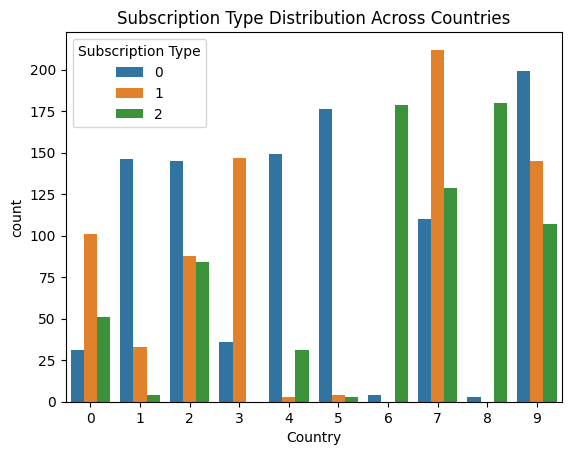

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Country', hue='Subscription Type', data=df)
plt.title('Subscription Type Distribution Across Countries')
plt.show()


We can generate more plots to understand relationships between different variables. The goal of this step is to gain insights that could help in feature engineering and model selection.

Once we've completed this, we can move on to creating the model.

## Step 3: Splitting the Dataset

Before we train our model, we'll need to split the data into a training set and a test set. This allows us to evaluate how our model will perform on unseen data.

In [9]:
from sklearn.model_selection import train_test_split

# We first define our 'X' and 'y' variables
X = df.drop('Subscription Type', axis=1)
y = df['Subscription Type']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The test_size=0.2 inside the function indicates the percentage of the data that should be held over for testing. It’s usually around 80/20 or 70/30.


## Step 4: Building the Model

Next, we'll build our Random Forest model and fit it on the training data:

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

That's it for model building. For now, we're using default parameters for our Random Forest. There are many parameters we could tune to improve the performance of the model, but for simplicity, we'll stick with the defaults.

## Step 5: Model Evaluation

Now that we've trained our Random Forest model, we'll want to evaluate its performance. We'll first use it to make predictions on our test set, and then we'll compare these predictions to the actual values.

In [11]:
# Use the model to make predictions on the test set
y_pred = model.predict(X_test)

For a classification problem like this, there are several metrics we can use to evaluate our model's performance. Let's start with accuracy:

In [12]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Model accuracy: {accuracy}')


Model accuracy: 0.56


Accuracy tells us the proportion of instances that our model predicted correctly. However, it's not always the best metric, especially if our classes are imbalanced. Therefore, we'll also look at a confusion matrix and the classification report, which gives us precision, recall, and f1-score:

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print(classification_report(y_test, y_pred))


[[119  46  20]
 [ 48  67  31]
 [ 39  36  94]]
              precision    recall  f1-score   support

           0       0.58      0.64      0.61       185
           1       0.45      0.46      0.45       146
           2       0.65      0.56      0.60       169

    accuracy                           0.56       500
   macro avg       0.56      0.55      0.55       500
weighted avg       0.56      0.56      0.56       500



These metrics will give us a more nuanced understanding of our model's performance. Precision tells us the proportion of positive identifications that were actually correct, recall tells us the proportion of actual positives that were identified correctly, and the f1-score is a combination of both.

## Step 6: Hyperparameter Tuning

Machine learning models have several hyperparameters that we can tune to improve their performance. For Random Forests, some important hyperparameters include the number of trees in the forest (n_estimators), the function to measure the quality of a split (criterion), and the maximum depth of the tree (max_depth).

One common method for hyperparameter tuning is grid search. This involves specifying a range of potential values for different hyperparameters, and then testing the model's performance across all possible combinations.

Let's perform a grid search with cross-validation on our Random Forest model:

In [14]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
}

# Initialize the grid search
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit it to the data and find the best parameters
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")


Best parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}
Best score: 0.617


This will print out the best parameters found by grid search, and the corresponding cross-validation score.

Keep in mind that grid search can take a while, especially if we have a large range of hyperparameters. Start with a smaller range, and then refine the search based on the results.

After finding the best parameters, we can use them to create a new model and evaluate its performance.

Remember, machine learning is an iterative process, and there's always more we can do to improve our model, from more extensive hyperparameter tuning, trying different models, to going back and doing more feature engineering. The key is to keep experimenting and learning.

## Step 7: Training the Final Model and Making Predictions


Now that we've found our best parameters using grid search, we can use these to train our final model and make predictions. Remember that the final evaluation should be done on the test set to get an unbiased estimate of the model's performance:

In [15]:
# Initialize a new model with the best parameters
final_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)

# Train the model
final_model.fit(X_train, y_train)

# Make predictions on the test set
final_y_pred = final_model.predict(X_test)

You can then evaluate this final model just as before:

In [16]:
# Calculate the final accuracy
final_accuracy = accuracy_score(y_test, final_y_pred)

# Print the final confusion matrix and classification report
print(f'Final model accuracy: {final_accuracy}')
print(confusion_matrix(y_test, final_y_pred))
print(classification_report(y_test, final_y_pred))

Final model accuracy: 0.58
[[131  39  15]
 [ 51  66  29]
 [ 44  32  93]]
              precision    recall  f1-score   support

           0       0.58      0.71      0.64       185
           1       0.48      0.45      0.47       146
           2       0.68      0.55      0.61       169

    accuracy                           0.58       500
   macro avg       0.58      0.57      0.57       500
weighted avg       0.58      0.58      0.58       500



This will give us the performance of our final, tuned model.

## Step 8: Document your Findings